# Analise exploratória preliminar dos dados de Heart Diseases. 

Dados disponíveis em: https://archive.ics.uci.edu/dataset/45/heart+disease

Hipoteses a serem respondidas. 

## Objetivo do Projeto

O objetivo principal é analisar fatores de risco associados à presença de doenças cardíacas e representar visualmente as relações mais relevantes entre variáveis clínicas dos pacientes, conforme especificado nos requisitos.

## Perguntas Centrais

1.  A idade e o sexo estão relacionados com a presença de doença cardíaca?
2.  Como a frequência cardíaca máxima (thalach) e o nível de colesterol (chol) variam entre pacientes com e sem doença cardíaca?
3.  Existe diferença no risco de doença cardíaca entre os diferentes tipos de dor no peito (cp)?

## Variáveis Principais

Os dados contemplam pacientes do hospital de Cleveland, com as seguintes variáveis principais:

*   **Demográficas**: `age` (idade), `sex` (sexo).
*   **Clínicas**: `trestbps` (pressão sanguínea em repouso), `chol` (colesterol sérico), `thalach` (frequência cardíaca máxima atingida), `exang` (angina induzida por exercício), `oldpeak` (depressão de ST induzida por exercício em relação ao repouso), `cp` (tipo de dor no peito), `restecg` (resultados do eletrocardiograma em repouso).
*   **Variável Alvo**: `num` (diagnóstico de doença cardíaca, onde 0 = ausência e 1 = presença).

O foco será entender padrões de correlação e diferenças entre pacientes doentes e saudáveis.

In [50]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
    'oldpeak', 'slope', 'ca', 'thal', 'num'
]
# metadata 
df = pd.read_csv('data/heart+disease 3/processed.cleveland.data', header=None, names=column_names)



### Tratamento valores vazios

In [51]:
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

### Variáveis Dataset (input X)

In [52]:
X = df.drop('num', axis=1)
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
y = df['num'].apply(lambda x: 1 if x > 0 else 0)  # Binarize target variable

## Caracterização dos dados

- cálculo das medidas de Localização

- Medidas de Dispersão

- Medidas de Forma e Distribuição

Variáveis Numericas:

    - Age: idade

    - trestbps: pressao sanguinea repouso

    - chol: colesterol

    - thalach: Maxima taxa de Batimento Cardiacos

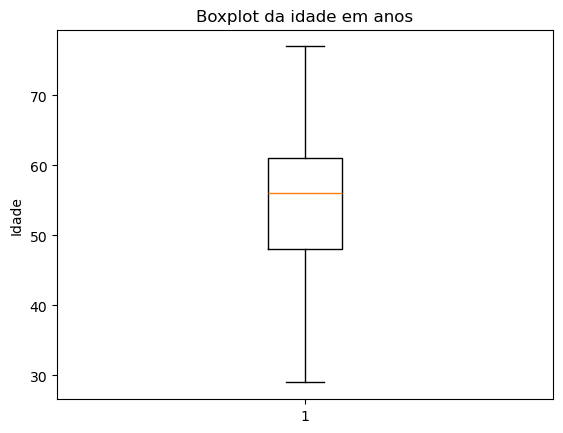

In [53]:
plt.boxplot(X['age'])
plt.title('Boxplot da idade em anos')
plt.ylabel('Idade')
plt.show()

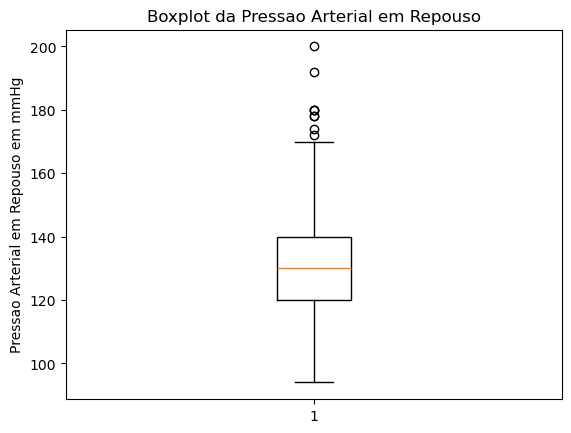

In [54]:
plt.boxplot(X['trestbps'])
plt.title('Boxplot da Pressao Arterial em Repouso') 
plt.ylabel('Pressao Arterial em Repouso em mmHg')
plt.show()

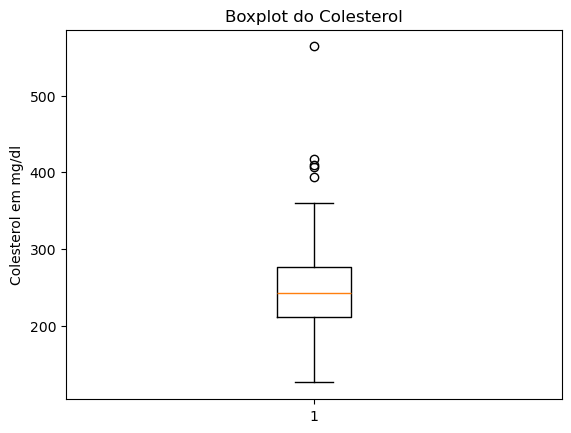

In [55]:
plt.boxplot(X['chol'])
plt.title('Boxplot do Colesterol')
plt.ylabel('Colesterol em mg/dl')
plt.show()

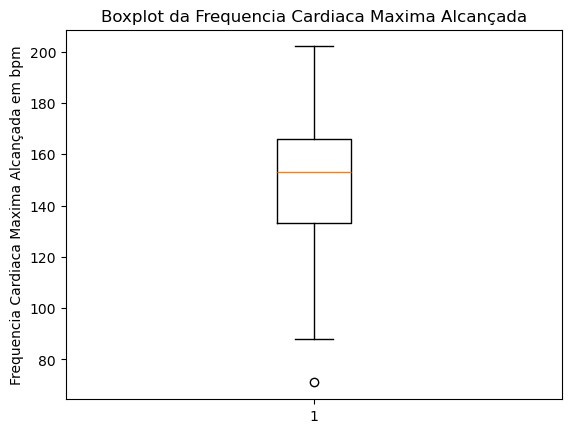

In [56]:
plt.boxplot(X['thalach'])
plt.title('Boxplot da Frequencia Cardiaca Maxima Alcançada')
plt.ylabel('Frequencia Cardiaca Maxima Alcançada em bpm')
plt.show()

In [57]:
print("Resumo Estatístico das Variáveis Numéricas:")
print(X.describe())
print("\nDistribuição das Variáveis Categóricas:")
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for var in categorical_vars:
    print(f"\n{var}:\n{X[var].value_counts()}")
print(X.head())
print(y.head())      

Resumo Estatístico das Variáveis Numéricas:
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope  
count  297.000000  297.000000  297.000000  297.000000  297.000000  
mean     0.996633  149.599327    0.326599    1.055556    1.602694  
std      0.994914   22

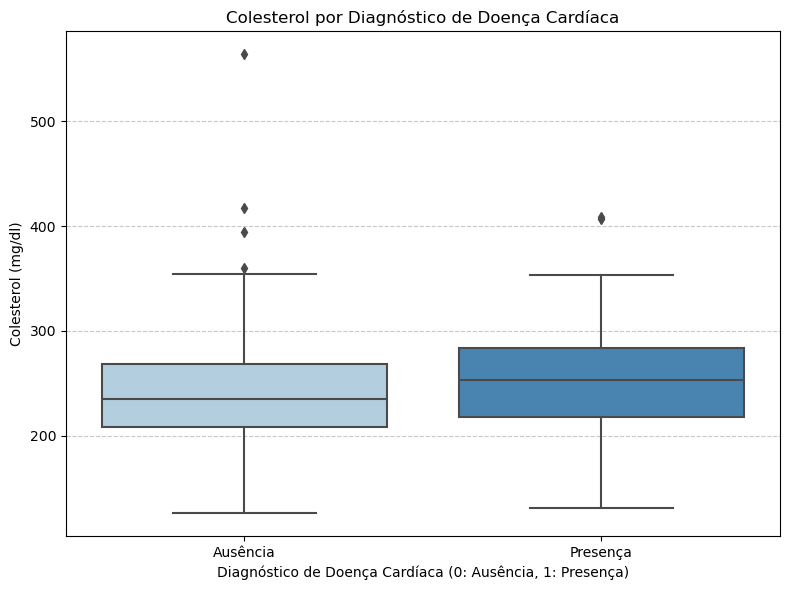

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plt.figure(figsize=(8, 6))
sns.boxplot(x='num', y='chol', data=df, palette='Blues')
plt.title('Colesterol por Diagnóstico de Doença Cardíaca')
plt.xlabel('Diagnóstico de Doença Cardíaca (0: Ausência, 1: Presença)')
plt.ylabel('Colesterol (mg/dl)')
plt.xticks(ticks=[0, 1], labels=[
    'Ausência', 'Presença'
])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [59]:
df[['num','thalach']]

,num,thalach
0,0,150.0
1,1,108.0
2,1,129.0
3,0,187.0
4,0,172.0
...,...,...
297,1,123.0
298,1,132.0
299,1,141.0
300,1,115.0


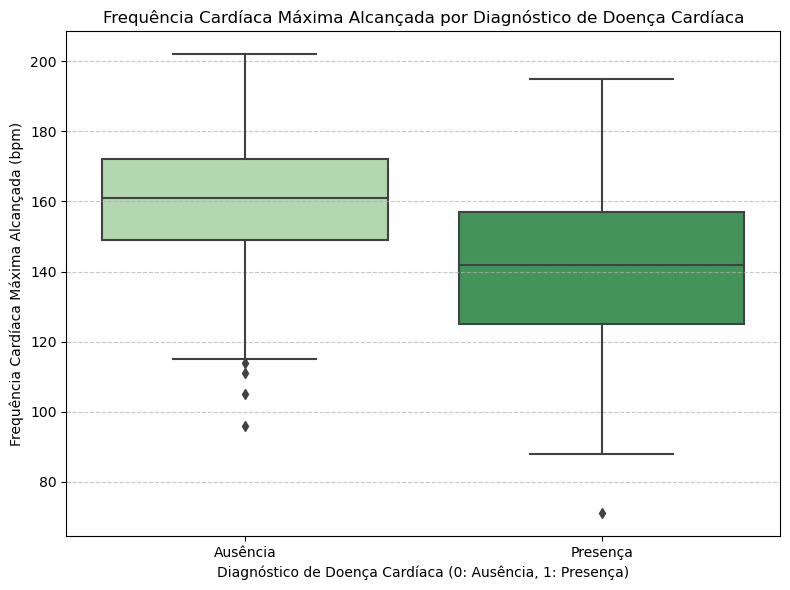

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='num', y='thalach', data=df, palette='Greens')
plt.title('Frequência Cardíaca Máxima Alcançada por Diagnóstico de Doença Cardíaca')
plt.xlabel('Diagnóstico de Doença Cardíaca (0: Ausência, 1: Presença)')
plt.ylabel('Frequência Cardíaca Máxima Alcançada (bpm)')
plt.xticks(ticks=[0, 1], labels=[
    'Ausência', 'Presença'
])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Correlação entre as variáveis numéricas:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.092399  0.110471  0.290476  0.202644  0.132062   
sex      -0.092399  1.000000  0.008908 -0.066340 -0.198089  0.038850   
cp        0.110471  0.008908  1.000000 -0.036980  0.072088 -0.057663   
trestbps  0.290476 -0.066340 -0.036980  1.000000  0.131536  0.180860   
chol      0.202644 -0.198089  0.072088  0.131536  1.000000  0.012708   
fbs       0.132062  0.038850 -0.057663  0.180860  0.012708  1.000000   
restecg   0.149917  0.033897  0.063905  0.149242  0.165046  0.068831   
thalach  -0.394563 -0.060496 -0.339308 -0.049108 -0.000075 -0.007842   
exang     0.096489  0.143581  0.377525  0.066691  0.059339 -0.000893   
oldpeak   0.197123  0.106567  0.203244  0.191243  0.038596  0.008311   
slope     0.159405  0.033345  0.151079  0.121172 -0.009215  0.047819   
ca        0.362210  0.091925  0.235644  0.097954  0.115945  0.152086   
thal      0.126586  0.3

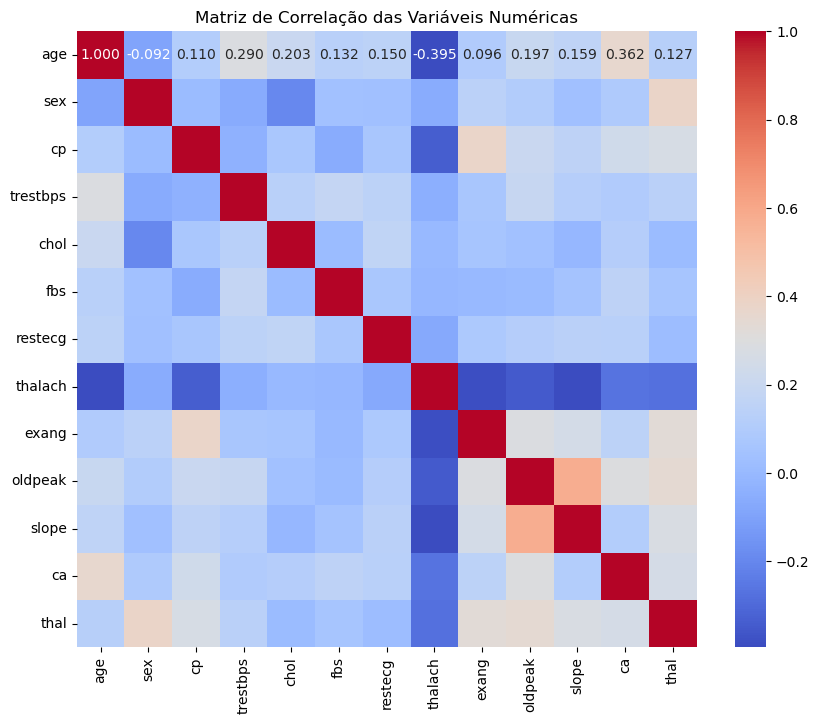

In [61]:

print("Correlação entre as variáveis numéricas:")
corr = X.corr()
print(corr)
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".3f", cmap='coolwarm')
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

In [62]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np


# Assumindo que você já tem X e y definidos
X = pd.get_dummies(X, columns=[
    'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'
], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definindo os modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(), 
    'Gradient Boosting': GradientBoostingClassifier()
}

# Configurando K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Dicionários para armazenar resultados
accuracies = {name: [] for name in models.keys()}
sensitivities = {name: [] for name in models.keys()}

# Para cada modelo
for name, model in models.items():
    print(f'\nAvaliando {name}:')
    
    # Para cada fold
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
        # Separar dados de treino e validação
        X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        X_fold_train = np.array(X_fold_train)
        X_fold_val = np.array(X_fold_val)
        y_fold_train = np.array(y_fold_train).ravel()
        y_fold_val = np.array(y_fold_val).ravel()
        # Treinar e predizer
        model.fit(X_fold_train, y_fold_train)
        y_pred = model.predict(X_fold_val)
        
        # Calcular métricas
        acc = accuracy_score(y_fold_val, y_pred)
        sens = recall_score(y_fold_val, y_pred, average='macro')
        
        accuracies[name].append(acc)
        sensitivities[name].append(sens)
        
        print(f'Fold {fold+1} - Acurácia: {acc:.3f}, Sensibilidade: {sens:.3f}')
    
    # Calcular e mostrar médias
    print(f'Média - Acurácia: {np.mean(accuracies[name]):.3f} (±{np.std(accuracies[name]):.3f})')
    print(f'Média - Sensibilidade: {np.mean(sensitivities[name]):.3f} (±{np.std(sensitivities[name]):.3f})')


Avaliando Logistic Regression:
Fold 1 - Acurácia: 0.896, Sensibilidade: 0.896
Fold 2 - Acurácia: 0.812, Sensibilidade: 0.811
Fold 3 - Acurácia: 0.787, Sensibilidade: 0.789
Fold 4 - Acurácia: 0.787, Sensibilidade: 0.756
Fold 5 - Acurácia: 0.936, Sensibilidade: 0.942
Média - Acurácia: 0.844 (±0.061)
Média - Sensibilidade: 0.839 (±0.069)

Avaliando Decision Tree:
Fold 1 - Acurácia: 0.708, Sensibilidade: 0.708
Fold 2 - Acurácia: 0.667, Sensibilidade: 0.671
Fold 3 - Acurácia: 0.638, Sensibilidade: 0.614
Fold 4 - Acurácia: 0.553, Sensibilidade: 0.559
Fold 5 - Acurácia: 0.660, Sensibilidade: 0.656
Média - Acurácia: 0.645 (±0.051)
Média - Sensibilidade: 0.642 (±0.051)

Avaliando SVM:
Fold 1 - Acurácia: 0.604, Sensibilidade: 0.604
Fold 2 - Acurácia: 0.708, Sensibilidade: 0.699
Fold 3 - Acurácia: 0.723, Sensibilidade: 0.714
Fold 4 - Acurácia: 0.574, Sensibilidade: 0.565
Fold 5 - Acurácia: 0.574, Sensibilidade: 0.588
Média - Acurácia: 0.637 (±0.066)
Média - Sensibilidade: 0.634 (±0.061)

Avalian

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Fold 3 - Acurácia: 0.766, Sensibilidade: 0.770
Fold 4 - Acurácia: 0.766, Sensibilidade: 0.744
Fold 5 - Acurácia: 0.851, Sensibilidade: 0.861
Média - Acurácia: 0.797 (±0.032)
Média - Sensibilidade: 0.796 (±0.040)

Avaliando Gradient Boosting:
Fold 1 - Acurácia: 0.833, Sensibilidade: 0.833
Fold 2 - Acurácia: 0.688, Sensibilidade: 0.686
Fold 3 - Acurácia: 0.745, Sensibilidade: 0.739
Fold 4 - Acurácia: 0.723, Sensibilidade: 0.701
Fold 5 - Acurácia: 0.872, Sensibilidade: 0.875
Média - Acurácia: 0.772 (±0.069)
Média - Sensibilidade: 0.767 (±0.075)


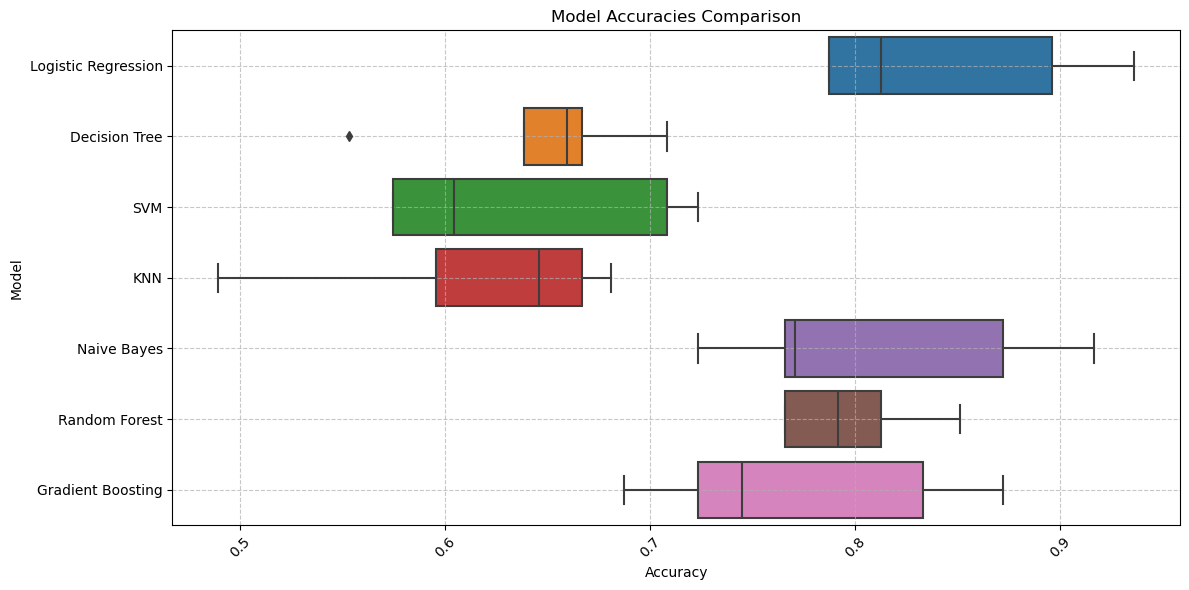

In [64]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Convert the accuracies dictionary to a DataFrame format suitable for boxplot
accuracy_data = []
for model_name, acc_values in accuracies.items():
    for acc in acc_values:
        accuracy_data.append({ 'Accuracy': acc,'Model': model_name})
df_accuracies = pd.DataFrame(accuracy_data)

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Accuracy', y='Model', data=df_accuracies)

# Customize the plot
plt.title('Model Accuracies Comparison')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()